In [43]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [51]:
import matplotlib.pyplot as plt

# Fetch the MNIST dataset
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)

# Splitting the data for training and validation
# You could modify if you need
train_samples = 60000
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


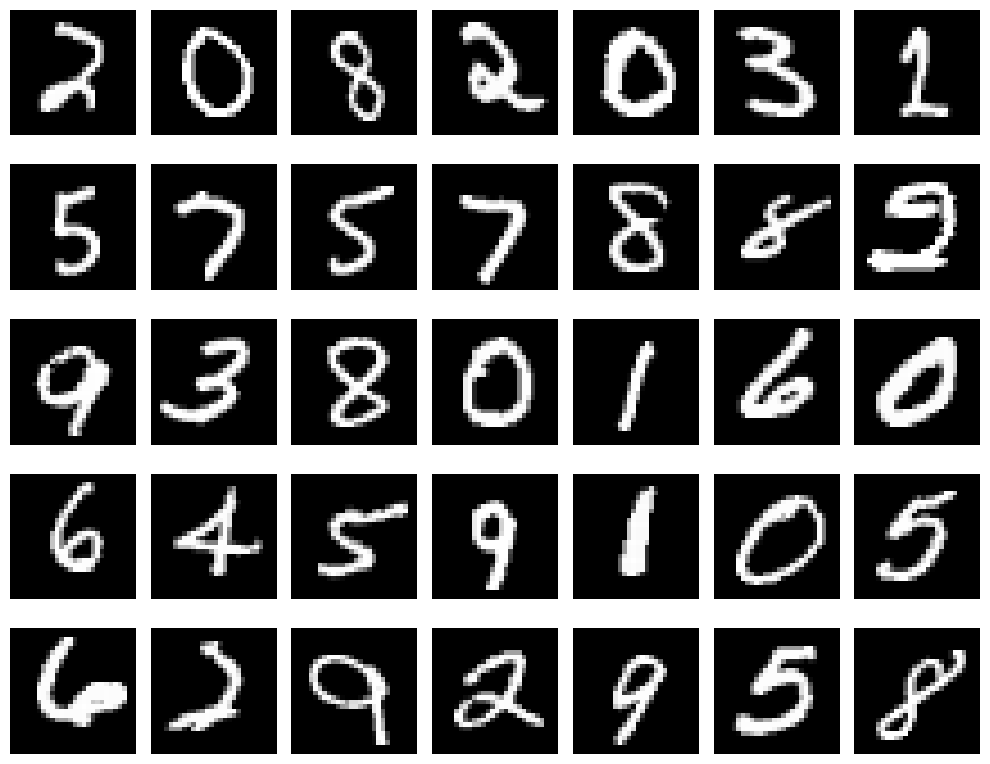

In [52]:
# Select 35 random data points
num_data_points = 35
random_indices = np.random.randint(0, len(X), num_data_points)

# Create a 5x7 chart to display the images
fig, axes = plt.subplots(5, 7, figsize=(10, 8))

# Display the selected images on the chart
for i, index in enumerate(random_indices):
    row = i // 7
    col = i % 7
    axes[row, col].imshow(X[index].reshape(28, 28), cmap='gray')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

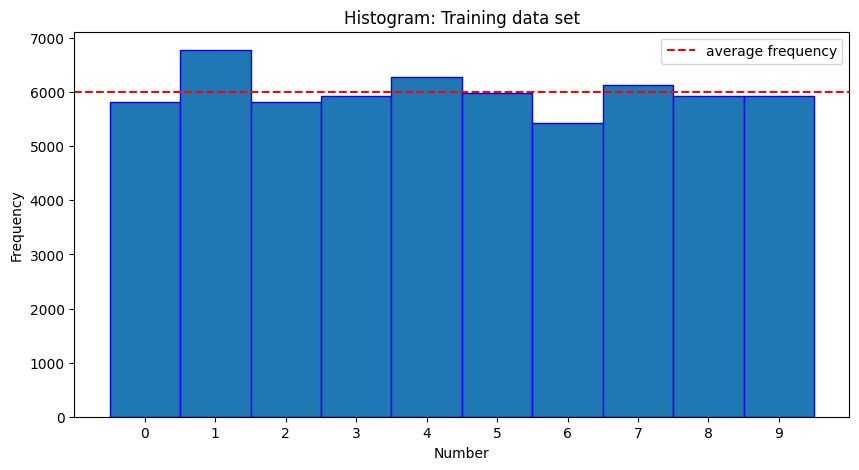

In [53]:
#Show frequency of each number
label=['0','1', '2','3','4','5', '6', '7','8', '9']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.hist(y_train,bins=[0,1,2,3,4,5,6,7,8,9,10], edgecolor="b", histtype="bar",align='left')
ax.set_title('Histogram: Training data set')
ax.set(xlabel='Number', ylabel='Frequency')
ax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9] )
ax.xaxis.set_ticklabels(label)
ax.axhline(y=(y_train.size/10), label="average frequency",linestyle='dashed', color='r')
ax.legend()

In [54]:
score_of_1st_model = []
for i in range(10):
    clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    score_of_1st_model.append(score)
    print(f"Accuracy of 1st model (Iteration {i+1}): {score}")

score_of_2nd_model = []
for i in range(10):
    clf2 = LogisticRegression(C=50.0 / train_samples, penalty="l2", solver="saga", tol=0.1)
    clf2.fit(X_train, y_train)
    score2 = clf2.score(X_test, y_test)
    score_of_2nd_model.append(score2)
    print(f"Accuracy of 2nd model (Iteration {i+1}): {score2}")


Accuracy of 1st model (Iteration 1): 0.8334
Accuracy of 1st model (Iteration 2): 0.8334
Accuracy of 1st model (Iteration 3): 0.8341
Accuracy of 1st model (Iteration 4): 0.8337
Accuracy of 1st model (Iteration 5): 0.8346
Accuracy of 1st model (Iteration 6): 0.8339
Accuracy of 1st model (Iteration 7): 0.8334
Accuracy of 1st model (Iteration 8): 0.8342
Accuracy of 1st model (Iteration 9): 0.8342
Accuracy of 1st model (Iteration 10): 0.835
Accuracy of 2nd model (Iteration 1): 0.8747
Accuracy of 2nd model (Iteration 2): 0.8743
Accuracy of 2nd model (Iteration 3): 0.8757
Accuracy of 2nd model (Iteration 4): 0.8752
Accuracy of 2nd model (Iteration 5): 0.8754
Accuracy of 2nd model (Iteration 6): 0.8749
Accuracy of 2nd model (Iteration 7): 0.8755
Accuracy of 2nd model (Iteration 8): 0.8751
Accuracy of 2nd model (Iteration 9): 0.8778
Accuracy of 2nd model (Iteration 10): 0.8756


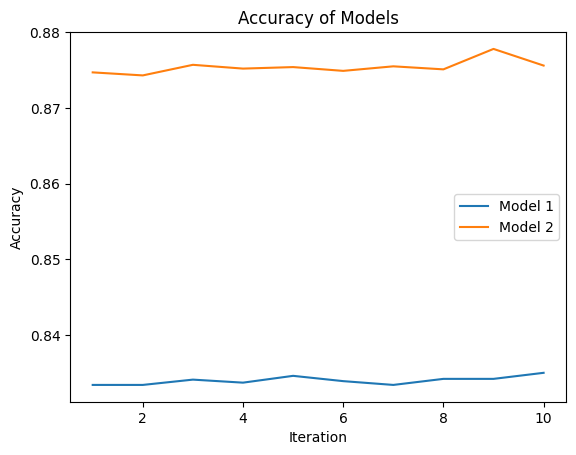

In [55]:
import matplotlib.pyplot as plt

# Plot the accuracy records of the 1st model
plt.plot(range(1, 11), score_of_1st_model, label='Model 1')

# Plot the accuracy records of the 2nd model
plt.plot(range(1, 11), score_of_2nd_model, label='Model 2')

# Set the plot title and labels
plt.title('Accuracy of Models')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

# Add a legend
plt.legend()

# Display the plot
plt.show()


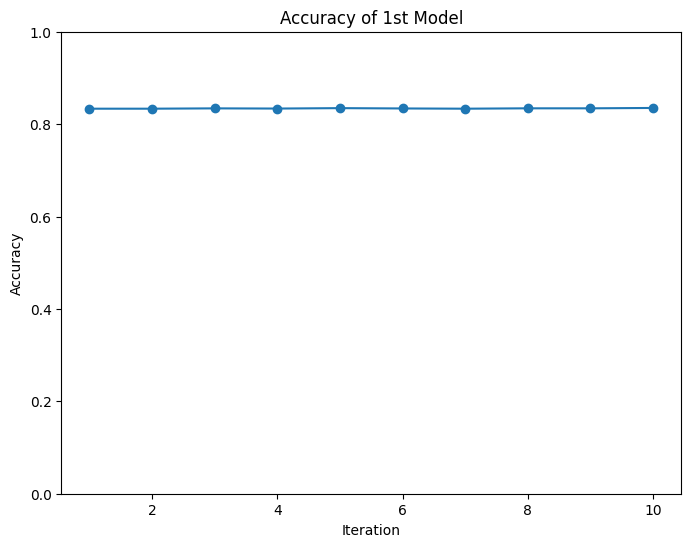

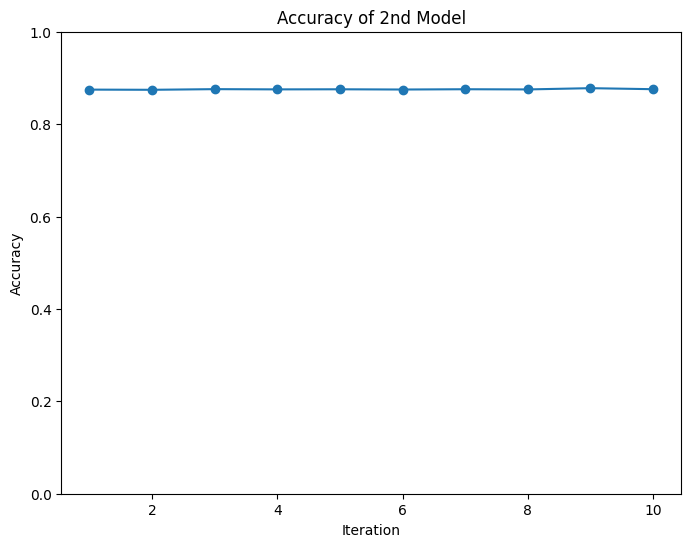

In [56]:
# Plot accuracy for the 1st model
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), score_of_1st_model, marker='o')
plt.title('Accuracy of 1st Model')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

# Plot accuracy for the 2nd model
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), score_of_2nd_model, marker='o')
plt.title('Accuracy of 2nd Model')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()